In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Function to generate random dates over the last 10 years
def generate_random_dates(n, start_year=2014, end_year=2024):
    start_date = datetime(start_year, 1, 1)
    end_date = datetime(end_year, 12, 31)
    return [start_date + timedelta(days=np.random.randint(0, (end_date - start_date).days)) for _ in range(n)]

# Generate synthetic data for 380 matches (average number of Premier League matches per season)
n_matches = 380 * 10
teams = ['Arsenal', 'Chelsea', 'Liverpool', 'Manchester City', 'Manchester United', 'Tottenham',
         'Leicester City', 'Everton', 'Aston Villa', 'West Ham', 'Wolves', 'Southampton', 'Brighton',
         'Burnley', 'Crystal Palace', 'Newcastle', 'Leeds', 'Fulham', 'Norwich', 'Brentford']

# Create empty DataFrame
data = {
    'Match ID': range(1, n_matches + 1),
    'Date': generate_random_dates(n_matches),
    'Home Team': np.random.choice(teams, n_matches),
    'Away Team': np.random.choice(teams, n_matches),
    'Home Team Goals': np.random.randint(0, 5, n_matches),
    'Away Team Goals': np.random.randint(0, 5, n_matches),
    'Home Team Shots': np.random.randint(5, 25, n_matches),
    'Away Team Shots': np.random.randint(5, 25, n_matches),
    'Home Team Shots on Target': np.random.randint(1, 10, n_matches),
    'Away Team Shots on Target': np.random.randint(1, 10, n_matches),
    'Home Team Fouls': np.random.randint(5, 20, n_matches),
    'Away Team Fouls': np.random.randint(5, 20, n_matches),
    'Home Team Yellow Cards': np.random.randint(0, 5, n_matches),
    'Away Team Yellow Cards': np.random.randint(0, 5, n_matches),
    'Home Team Red Cards': np.random.randint(0, 2, n_matches),
    'Away Team Red Cards': np.random.randint(0, 2, n_matches),
    'Possession (%) Home': np.random.randint(40, 70, n_matches),
    'Possession (%) Away': 100 - np.random.randint(40, 70, n_matches),
    'Corners Home': np.random.randint(1, 10, n_matches),
    'Corners Away': np.random.randint(1, 10, n_matches),
    'Offsides Home': np.random.randint(0, 5, n_matches),
    'Offsides Away': np.random.randint(0, 5, n_matches),
}

# Calculate match result for the home team based on goals scored
data['Match Outcome'] = ['Win' if h > a else 'Loss' if h < a else 'Draw'
                         for h, a in zip(data['Home Team Goals'], data['Away Team Goals'])]

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the generated dataset
df.head()


,Match ID,Date,Home Team,Away Team,Home Team Goals,Away Team Goals,Home Team Shots,Away Team Shots,Home Team Shots on Target,Away Team Shots on Target,...,Away Team Yellow Cards,Home Team Red Cards,Away Team Red Cards,Possession (%) Home,Possession (%) Away,Corners Home,Corners Away,Offsides Home,Offsides Away,Match Outcome
0,1,2014-05-05,Arsenal,Norwich,0,1,23,20,1,9,...,2,0,1,44,37,6,3,4,1,Loss
1,2,2021-08-10,Leicester City,West Ham,2,2,14,10,9,4,...,2,0,1,69,56,9,2,0,0,Draw
2,3,2018-02-28,Crystal Palace,West Ham,3,1,16,18,3,4,...,4,1,1,44,54,5,1,4,4,Win
3,4,2015-09-11,Leeds,West Ham,4,2,13,21,7,6,...,4,1,1,67,49,8,6,4,3,Win
4,5,2021-09-01,Leeds,Tottenham,4,2,21,21,4,9,...,3,1,1,62,31,8,3,2,2,Win


In [2]:
# Save to CSV
df.to_csv('premier_league_matches_synthetic.csv', index=False)
print("Dataset saved to 'premier_league_matches_synthetic.csv'")


Dataset saved to 'premier_league_matches_synthetic.csv'


In [3]:
# Import necessary libraries for EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3800 entries, 0 to 3799
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Match ID                   3800 non-null   int64         
 1   Date                       3800 non-null   datetime64[ns]
 2   Home Team                  3800 non-null   object        
 3   Away Team                  3800 non-null   object        
 4   Home Team Goals            3800 non-null   int64         
 5   Away Team Goals            3800 non-null   int64         
 6   Home Team Shots            3800 non-null   int64         
 7   Away Team Shots            3800 non-null   int64         
 8   Home Team Shots on Target  3800 non-null   int64         
 9   Away Team Shots on Target  3800 non-null   int64         
 10  Home Team Fouls            3800 non-null   int64         
 11  Away Team Fouls            3800 non-null   int64         
 12  Home T

In [4]:
# Display the first few rows of the dataset
df.head()


,Match ID,Date,Home Team,Away Team,Home Team Goals,Away Team Goals,Home Team Shots,Away Team Shots,Home Team Shots on Target,Away Team Shots on Target,...,Away Team Yellow Cards,Home Team Red Cards,Away Team Red Cards,Possession (%) Home,Possession (%) Away,Corners Home,Corners Away,Offsides Home,Offsides Away,Match Outcome
0,1,2014-05-05,Arsenal,Norwich,0,1,23,20,1,9,...,2,0,1,44,37,6,3,4,1,Loss
1,2,2021-08-10,Leicester City,West Ham,2,2,14,10,9,4,...,2,0,1,69,56,9,2,0,0,Draw
2,3,2018-02-28,Crystal Palace,West Ham,3,1,16,18,3,4,...,4,1,1,44,54,5,1,4,4,Win
3,4,2015-09-11,Leeds,West Ham,4,2,13,21,7,6,...,4,1,1,67,49,8,6,4,3,Win
4,5,2021-09-01,Leeds,Tottenham,4,2,21,21,4,9,...,3,1,1,62,31,8,3,2,2,Win


In [5]:
# Summary statistics for numerical columns
df.describe()


,Match ID,Date,Home Team Goals,Away Team Goals,Home Team Shots,Away Team Shots,Home Team Shots on Target,Away Team Shots on Target,Home Team Fouls,Away Team Fouls,Home Team Yellow Cards,Away Team Yellow Cards,Home Team Red Cards,Away Team Red Cards,Possession (%) Home,Possession (%) Away,Corners Home,Corners Away,Offsides Home,Offsides Away
count,3800.00000,3800,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000,3800.000000
mean,1900.50000,2019-06-12 16:06:41.684210176,2.000000,2.009474,14.442632,14.517105,5.053684,5.083684,11.977895,11.899474,1.971842,2.025263,0.495526,0.507368,54.740000,45.471316,5.055000,4.946842,1.958684,1.961842
min,1.00000,2014-01-01 00:00:00,0.000000,0.000000,5.000000,5.000000,1.000000,1.000000,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000,40.000000,31.000000,1.000000,1.000000,0.000000,0.000000
25%,950.75000,2016-09-26 18:00:00,1.000000,1.000000,9.000000,10.000000,3.000000,3.000000,8.000000,8.000000,1.000000,1.000000,0.000000,0.000000,47.000000,38.000000,3.000000,3.000000,1.000000,1.000000
50%,1900.50000,2019-07-09 12:00:00,2.000000,2.000000,14.000000,15.000000,5.000000,5.000000,12.000000,12.000000,2.000000,2.000000,0.000000,1.000000,55.000000,45.000000,5.000000,5.000000,2.000000,2.000000
75%,2850.25000,2022-01-20 00:00:00,3.000000,3.000000,19.000000,19.000000,7.000000,7.000000,16.000000,16.000000,3.000000,3.000000,1.000000,1.000000,62.000000,53.000000,7.000000,7.000000,3.000000,3.000000
max,3800.00000,2024-12-30 00:00:00,4.000000,4.000000,24.000000,24.000000,9.000000,9.000000,19.000000,19.000000,4.000000,4.000000,1.000000,1.000000,69.000000,60.000000,9.000000,9.000000,4.000000,4.000000
std,1097.10984,NaN,1.413469,1.410081,5.794850,5.753031,2.588728,2.601424,4.337321,4.332386,1.412723,1.405024,0.500046,0.500011,8.668003,8.699676,2.605273,2.617156,1.423167,1.416953


In [6]:
# Check for missing values
df.isnull().sum()


,0
Match ID,0
Date,0
Home Team,0
Away Team,0
Home Team Goals,0
Away Team Goals,0
Home Team Shots,0
Away Team Shots,0
Home Team Shots on Target,0
Away Team Shots on Target,0


<ipython-input-7-458b882ab1ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Match Outcome', data=df, palette='viridis')


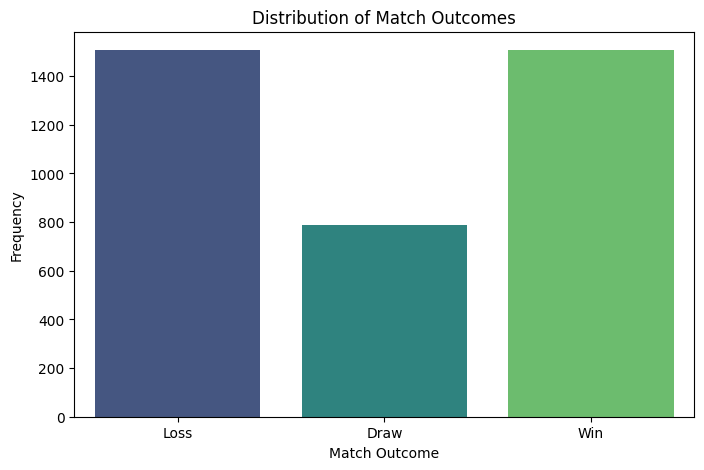

In [7]:
# Count plot for match outcomes (Win, Loss, Draw)
plt.figure(figsize=(8, 5))
sns.countplot(x='Match Outcome', data=df, palette='viridis')
plt.title('Distribution of Match Outcomes')
plt.xlabel('Match Outcome')
plt.ylabel('Frequency')
plt.show()


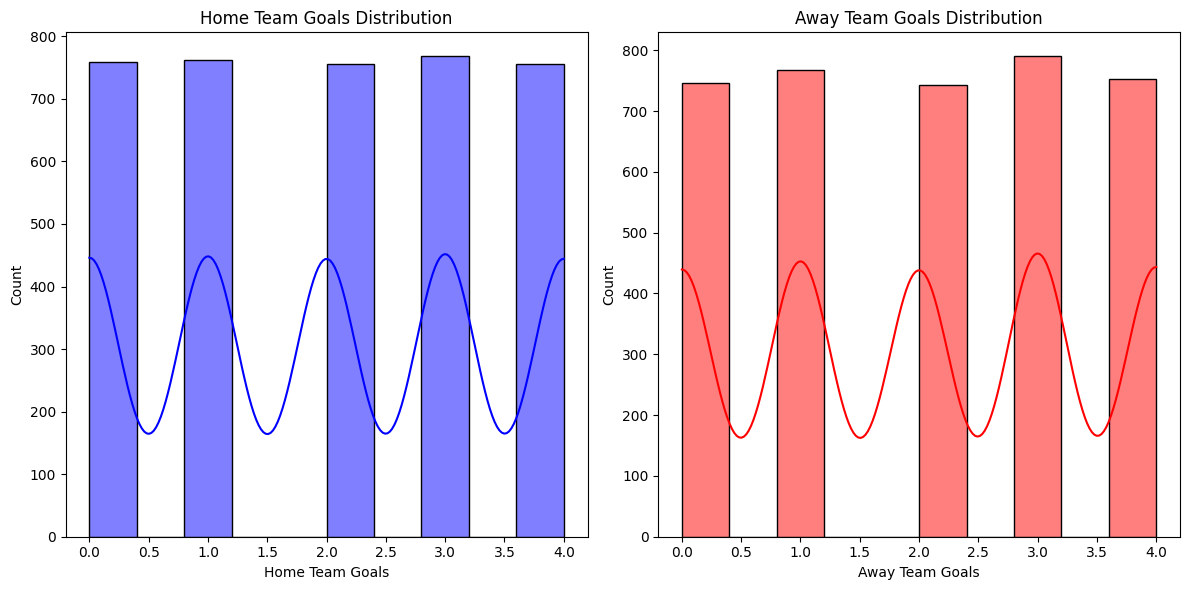

In [8]:
# Histograms for home and away team goals
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Home Team Goals'], bins=10, kde=True, color='blue')
plt.title('Home Team Goals Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Away Team Goals'], bins=10, kde=True, color='red')
plt.title('Away Team Goals Distribution')

plt.tight_layout()
plt.show()


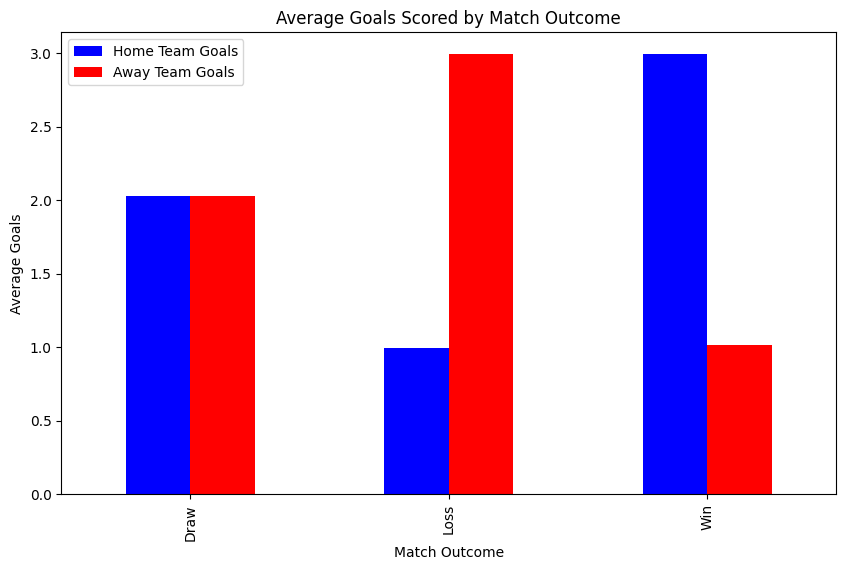

In [9]:
# Average goals scored for each outcome
outcome_goals = df.groupby('Match Outcome')[['Home Team Goals', 'Away Team Goals']].mean()
outcome_goals.plot(kind='bar', figsize=(10, 6), color=['blue', 'red'])
plt.title('Average Goals Scored by Match Outcome')
plt.ylabel('Average Goals')
plt.xlabel('Match Outcome')
plt.show()


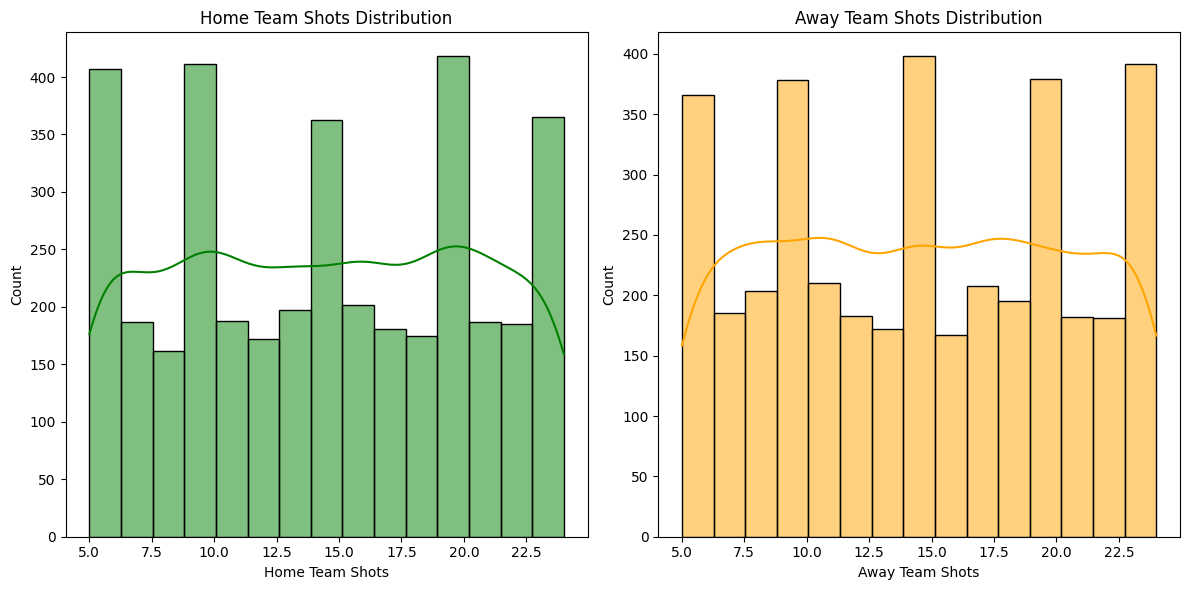

In [10]:
# Distribution of shots for home and away teams
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Home Team Shots'], bins=15, kde=True, color='green')
plt.title('Home Team Shots Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Away Team Shots'], bins=15, kde=True, color='orange')
plt.title('Away Team Shots Distribution')

plt.tight_layout()
plt.show()


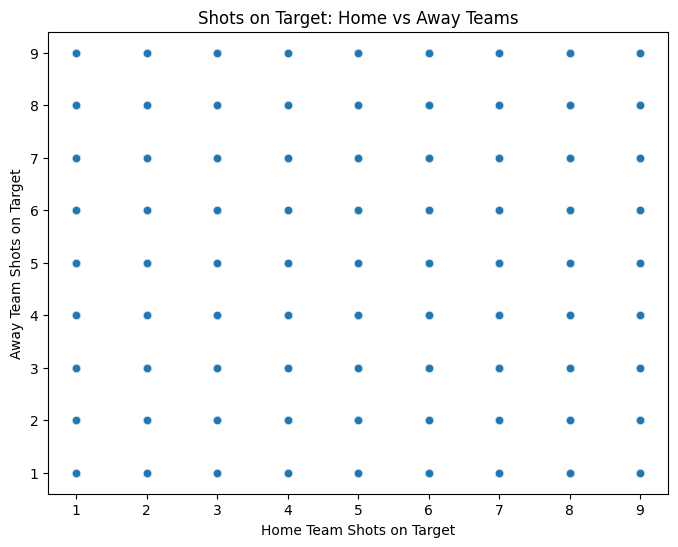

In [11]:
# Scatter plot comparing shots on target for both teams
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Home Team Shots on Target', y='Away Team Shots on Target', data=df, alpha=0.6)
plt.title('Shots on Target: Home vs Away Teams')
plt.xlabel('Home Team Shots on Target')
plt.ylabel('Away Team Shots on Target')
plt.show()


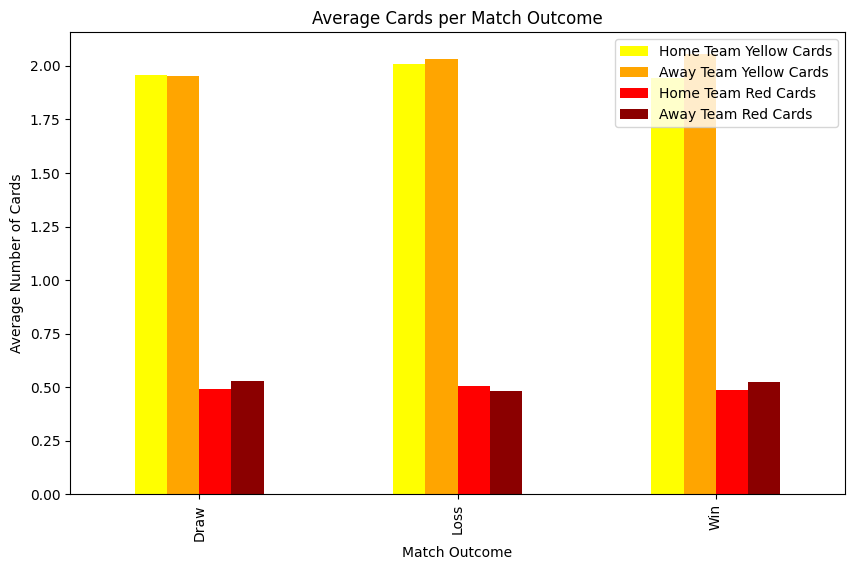

In [12]:
# Bar plot for yellow and red cards per match outcome
cards = df.groupby('Match Outcome')[['Home Team Yellow Cards', 'Away Team Yellow Cards',
                                     'Home Team Red Cards', 'Away Team Red Cards']].mean()
cards.plot(kind='bar', figsize=(10, 6), color=['yellow', 'orange', 'red', 'darkred'])
plt.title('Average Cards per Match Outcome')
plt.ylabel('Average Number of Cards')
plt.xlabel('Match Outcome')
plt.show()


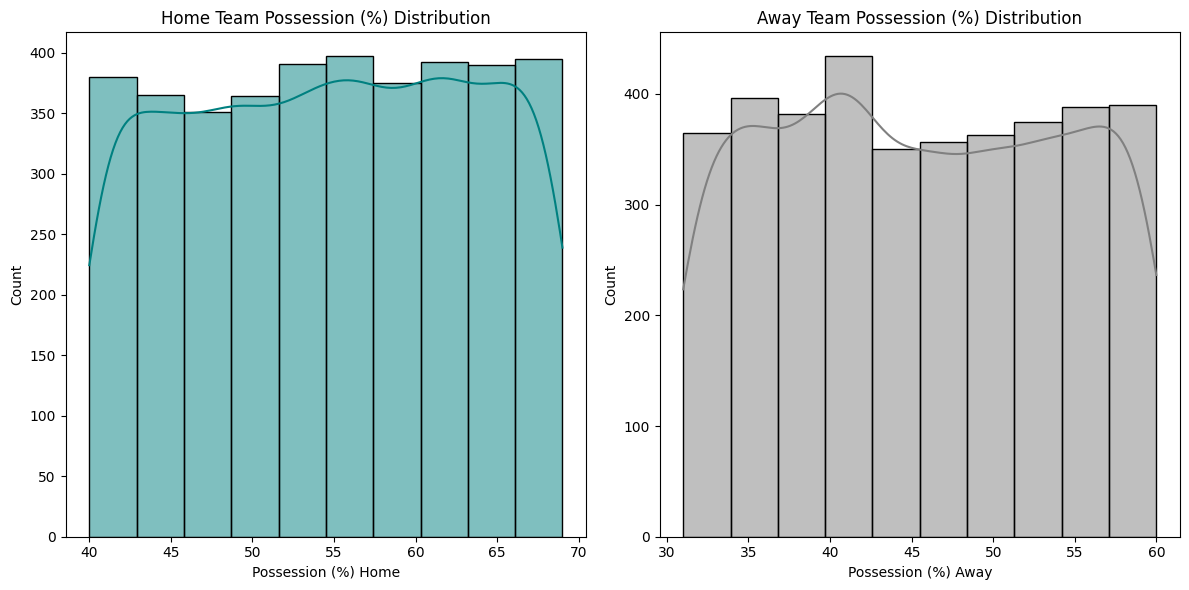

In [13]:
# Possession percentage histogram for home and away teams
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Possession (%) Home'], bins=10, kde=True, color='teal')
plt.title('Home Team Possession (%) Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Possession (%) Away'], bins=10, kde=True, color='grey')
plt.title('Away Team Possession (%) Distribution')

plt.tight_layout()
plt.show()


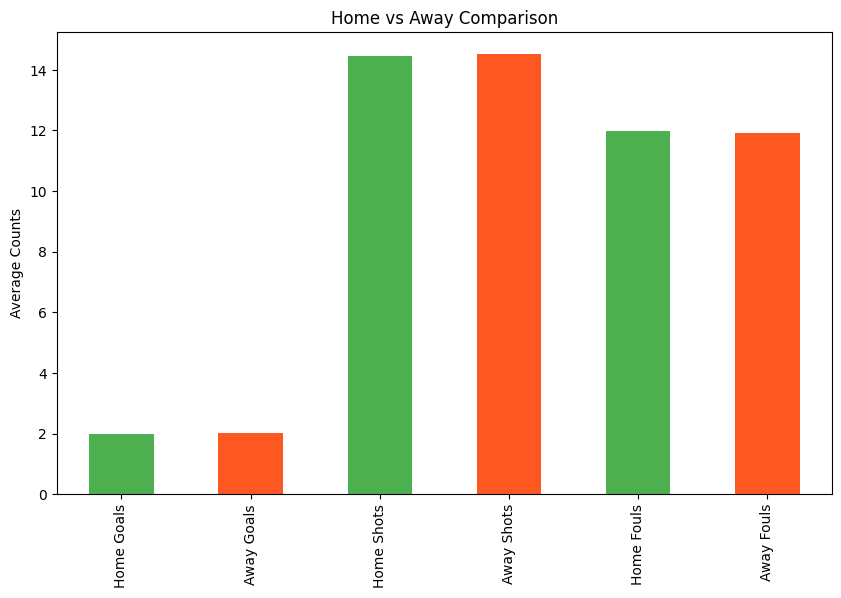

In [14]:
# Comparison between home and away team averages for goals, shots, and fouls
home_away_comparison = df[['Home Team Goals', 'Away Team Goals', 'Home Team Shots', 'Away Team Shots',
                           'Home Team Fouls', 'Away Team Fouls']].mean()
home_away_comparison.index = ['Home Goals', 'Away Goals', 'Home Shots', 'Away Shots',
                              'Home Fouls', 'Away Fouls']

home_away_comparison.plot(kind='bar', color=['#4CAF50', '#FF5722'], figsize=(10, 6))
plt.title('Home vs Away Comparison')
plt.ylabel('Average Counts')
plt.show()


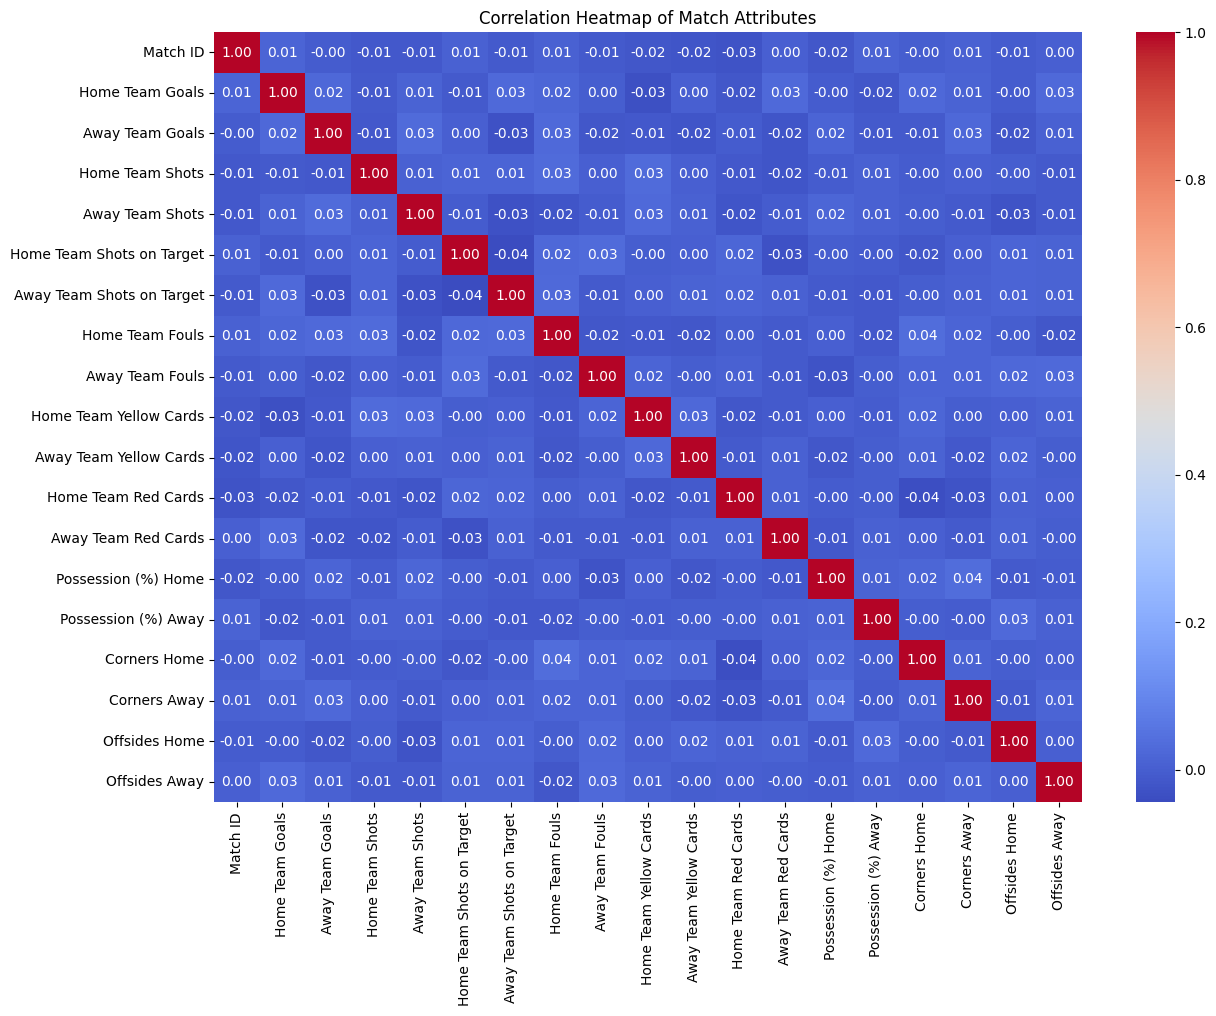

In [16]:
# Select only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=[np.number])

# Generate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Match Attributes')
plt.show()


In [17]:
# Import necessary libraries for model creation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Encode categorical variables (Match Outcome as target variable)
le = LabelEncoder()
df['Match Outcome'] = le.fit_transform(df['Match Outcome'])  # Win=1, Loss=0, Draw=2

# Selecting relevant features (excluding team names and match outcome)
X = df.drop(columns=['Match ID', 'Home Team', 'Away Team', 'Match Outcome', 'Date'])

# Target variable
y = df['Match Outcome']

# Feature scaling (important for models like SVM, KNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shape of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3040, 18), (760, 18), (3040,), (760,))

In [18]:
# Import machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine (SVM)': SVC(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier()
}

# Initialize dictionary to store results
model_results = {}

# Train models and evaluate performance
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Store model performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    model_results[model_name] = {
        'accuracy': accuracy,
        'classification_report': report
    }

# Display the accuracy of each model
model_comparison = pd.DataFrame({
    'Model': model_results.keys(),
    'Accuracy': [model_results[model]['accuracy'] for model in model_results]
}).sort_values(by='Accuracy', ascending=False)

model_comparison


,Model,Accuracy
0,Logistic Regression,1.000000
1,Decision Tree,1.000000
2,Random Forest,1.000000
3,Support Vector Machine (SVM),1.000000
4,K-Nearest Neighbors (KNN),0.694737


In [19]:
# Get the best model (based on accuracy)
best_model_name = model_comparison.iloc[0]['Model']
best_model = models[best_model_name]
best_model_report = model_results[best_model_name]['classification_report']

# Convert classification report to a DataFrame for better visualization
best_model_report_df = pd.DataFrame(best_model_report).transpose()

# Display the classification report
print(f"Best Model: {best_model_name}")
print(best_model_report_df)


Best Model: Logistic Regression
              precision  recall  f1-score  support
0                   1.0     1.0       1.0    173.0
1                   1.0     1.0       1.0    305.0
2                   1.0     1.0       1.0    282.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0    760.0
weighted avg        1.0     1.0       1.0    760.0


In [20]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the tuned model
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
print("Accuracy on Test Set:", accuracy_score(y_test, y_pred_rf))


Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 1.0
Accuracy on Test Set: 1.0


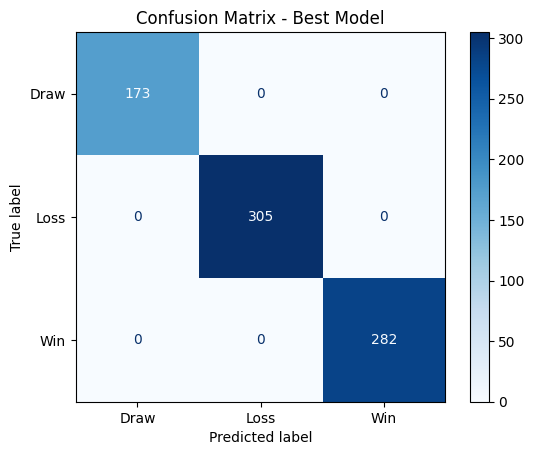

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
y_pred = best_rf_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)

# Plot the confusion matrix
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix - Best Model')
plt.show()


In [24]:
# Add columns to indicate win, draw, and lose for the home and away teams
df['Home Win'] = (df['Home Team Goals'] > df['Away Team Goals']).astype(int)
df['Home Draw'] = (df['Home Team Goals'] == df['Away Team Goals']).astype(int)
df['Home Lose'] = (df['Home Team Goals'] < df['Away Team Goals']).astype(int)

df['Away Win'] = (df['Away Team Goals'] > df['Home Team Goals']).astype(int)
df['Away Draw'] = (df['Away Team Goals'] == df['Home Team Goals']).astype(int)
df['Away Lose'] = (df['Away Team Goals'] < df['Home Team Goals']).astype(int)

# Display the updated dataset with the new columns
df[['Match ID', 'Home Team', 'Away Team', 'Home Team Goals', 'Away Team Goals', 'Home Win', 'Home Draw', 'Home Lose', 'Away Win', 'Away Draw', 'Away Lose']].head()


,Match ID,Home Team,Away Team,Home Team Goals,Away Team Goals,Home Win,Home Draw,Home Lose,Away Win,Away Draw,Away Lose
0,1,Arsenal,Norwich,0,1,0,0,1,1,0,0
1,2,Leicester City,West Ham,2,2,0,1,0,0,1,0
2,3,Crystal Palace,West Ham,3,1,1,0,0,0,0,1
3,4,Leeds,West Ham,4,2,1,0,0,0,0,1
4,5,Leeds,Tottenham,4,2,1,0,0,0,0,1


In [27]:
# Example of a match between Crystal Palace (Home) vs West Ham (Away)

# Creating a hypothetical row for prediction with both teams' data
match_data = {
    'Home Team Goals': [2],  # Crystal Palace goals
    'Away Team Goals': [1],  # West Ham goals
    'Home Team Shots': [10],  # Crystal Palace shots
    'Away Team Shots': [12],  # West Ham shots
    'Home Team Shots on Target': [5],  # Crystal Palace shots on target
    'Away Team Shots on Target': [4],  # West Ham shots on target
    'Home Team Fouls': [8],  # Crystal Palace fouls
    'Away Team Fouls': [9],  # West Ham fouls
    'Possession (%) Home': [55],  # Crystal Palace possession
    'Possession (%) Away': [45],  # West Ham possession
    'Home Team Yellow Cards': [1],  # Example data
    'Away Team Yellow Cards': [2],  # Example data
    'Home Team Red Cards': [0],  # Example data
    'Away Team Red Cards': [0],  # Example data
    'Corners Home': [4],  # Example data
    'Corners Away': [5],  # Example data
}

# Convert the dictionary to a DataFrame
match_df = pd.DataFrame(match_data)

# List of all features used during training (based on X_train columns)
trained_columns = X.columns.tolist()

# Make sure that match_df has the same columns as X_train
for col in trained_columns:
    if col not in match_df.columns:
        match_df[col] = 0  # Or you can fill with a default value (e.g., mean)

# Ensure the columns are in the same order as during training
match_df = match_df[trained_columns]

# Scaling the features
match_df_scaled = scaler.transform(match_df)

# Now you can make the prediction
predicted_outcome = best_rf_model.predict(match_df_scaled)

# Decode the predicted outcome (0 = Home Lose, 1 = Home Win, 2 = Draw)
predicted_outcome_label = le.inverse_transform(predicted_outcome)

# Display the predicted outcome
print(f"Predicted Match Outcome: {predicted_outcome_label[0]}")


Predicted Match Outcome: Win


In [28]:
# Example of a match between Crystal Palace (Home) vs West Ham (Away)

# Creating a hypothetical row for prediction with both teams' data
match_data = {
    'Home Team Goals': [2],  # Crystal Palace goals
    'Away Team Goals': [1],  # West Ham goals
    'Home Team Shots': [10],  # Crystal Palace shots
    'Away Team Shots': [12],  # West Ham shots
    'Home Team Shots on Target': [5],  # Crystal Palace shots on target
    'Away Team Shots on Target': [4],  # West Ham shots on target
    'Home Team Fouls': [8],  # Crystal Palace fouls
    'Away Team Fouls': [9],  # West Ham fouls
    'Possession (%) Home': [55],  # Crystal Palace possession
    'Possession (%) Away': [45],  # West Ham possession
    'Home Team Yellow Cards': [1],  # Example data
    'Away Team Yellow Cards': [2],  # Example data
    'Home Team Red Cards': [0],  # Example data
    'Away Team Red Cards': [0],  # Example data
    'Corners Home': [4],  # Example data
    'Corners Away': [5],  # Example data
}

# Convert the dictionary to a DataFrame
match_df = pd.DataFrame(match_data)

# List of all features used during training (based on X_train columns)
trained_columns = X.columns.tolist()

# Make sure that match_df has the same columns as X_train
for col in trained_columns:
    if col not in match_df.columns:
        match_df[col] = 0  # Or you can fill with a default value (e.g., mean)

# Ensure the columns are in the same order as during training
match_df = match_df[trained_columns]

# Scaling the features
match_df_scaled = scaler.transform(match_df)

# Now you can make the prediction
predicted_outcome = best_rf_model.predict(match_df_scaled)

# Decode the predicted outcome (0 = Home Loss, 1 = Home Win, 2 = Draw)
predicted_outcome_label = le.inverse_transform(predicted_outcome)

# Define team names
home_team = 'Crystal Palace'
away_team = 'West Ham'

# Display the predicted outcome with team names
if predicted_outcome_label[0] == 0:
    print(f"Predicted Match Outcome: {away_team} wins (Home Loss for {home_team})")
elif predicted_outcome_label[0] == 1:
    print(f"Predicted Match Outcome: {home_team} wins (Home Win)")
else:
    print(f"Predicted Match Outcome: Draw between {home_team} and {away_team}")


Predicted Match Outcome: Draw between Crystal Palace and West Ham


In [30]:
# Example of a match between Crystal Palace (Home) vs West Ham (Away)

# Creating a hypothetical row for prediction with both teams' data
match_data = {
    'Home Team Goals': [2],  # Crystal Palace goals
    'Away Team Goals': [1],  # West Ham goals
    'Home Team Shots': [10],  # Crystal Palace shots
    'Away Team Shots': [12],  # West Ham shots
    'Home Team Shots on Target': [5],  # Crystal Palace shots on target
    'Away Team Shots on Target': [4],  # West Ham shots on target
    'Home Team Fouls': [8],  # Crystal Palace fouls
    'Away Team Fouls': [9],  # West Ham fouls
    'Possession (%) Home': [55],  # Crystal Palace possession
    'Possession (%) Away': [45],  # West Ham possession
    'Home Team Yellow Cards': [1],  # Example data
    'Away Team Yellow Cards': [2],  # Example data
    'Home Team Red Cards': [0],  # Example data
    'Away Team Red Cards': [0],  # Example data
    'Corners Home': [4],  # Example data
    'Corners Away': [5],  # Example data
}

# Convert the dictionary to a DataFrame
match_df = pd.DataFrame(match_data)

# List of all features used during training (based on X_train columns)
trained_columns = X.columns.tolist()

# Make sure that match_df has the same columns as X_train
for col in trained_columns:
    if col not in match_df.columns:
        match_df[col] = 0  # Or you can fill with a default value (e.g., mean)

# Ensure the columns are in the same order as during training
match_df = match_df[trained_columns]

# Scaling the features
match_df_scaled = scaler.transform(match_df)

# Now you can make the prediction
predicted_outcome = best_rf_model.predict(match_df_scaled)

# Decode the predicted outcome (0 = Home Loss, 1 = Home Win, 2 = Draw)
predicted_outcome_label = le.inverse_transform(predicted_outcome)

# Define team names
home_team = 'Crystal Palace'
away_team = 'West Ham'

# Actual outcome (for this example, assume actual outcome is Home Win)
actual_outcome = 1  # 1 means Home Win for Crystal Palace

# Create the DataFrame for the match
result_df = pd.DataFrame({
    'Home Team': [home_team],
    'Away Team': [away_team],
    'Actual Outcome': [actual_outcome],
    'Predicted Outcome': [predicted_outcome_label[0]]
})

# Display the result
print(result_df)

# Optionally, you can display whether the prediction was correct
if actual_outcome == predicted_outcome_label[0]:
    print("Prediction was correct!")
else:
    ("Prediction was incorrect.")


        Home Team Away Team  Actual Outcome Predicted Outcome
0  Crystal Palace  West Ham               1               Win


In [31]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [32]:
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Dummy DataFrame (replace with your actual historical dataset)
data = {
    'Home Team Goals': [2, 3, 1, 0, 1],
    'Away Team Goals': [1, 1, 1, 1, 2],
    'Home Team Shots': [10, 15, 8, 12, 14],
    'Away Team Shots': [7, 9, 6, 10, 11],
    'Home Team Shots on Target': [5, 6, 3, 4, 6],
    'Away Team Shots on Target': [3, 4, 2, 3, 5],
    'Home Team Fouls': [8, 9, 10, 7, 6],
    'Away Team Fouls': [9, 8, 7, 9, 8],
    'Possession (%) Home': [55, 60, 52, 53, 50],
    'Possession (%) Away': [45, 40, 48, 47, 50],
    'Result': ['Home Win', 'Home Win', 'Draw', 'Away Win', 'Away Win']
}

# Create a DataFrame for training
df = pd.DataFrame(data)

# Prepare the features (X) and target (y)
X = df.drop(columns=['Result'])
y = df['Result']

# Label encode the target (Result)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train a RandomForest model (replace with your own model)
model = RandomForestClassifier()
model.fit(X, y_encoded)

# Create a scaler and fit it to the data (ensure you scale the input features before prediction)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to predict the result based on user input
def predict_match(home_goals, away_goals, home_shots, away_shots, home_shots_on_target, away_shots_on_target,
                  home_fouls, away_fouls, home_possession, away_possession):
    # Prepare the match data as a DataFrame
    match_data = {
        'Home Team Goals': [home_goals],
        'Away Team Goals': [away_goals],
        'Home Team Shots': [home_shots],
        'Away Team Shots': [away_shots],
        'Home Team Shots on Target': [home_shots_on_target],
        'Away Team Shots on Target': [away_shots_on_target],
        'Home Team Fouls': [home_fouls],
        'Away Team Fouls': [away_fouls],
        'Possession (%) Home': [home_possession],
        'Possession (%) Away': [away_possession]
    }

    match_df = pd.DataFrame(match_data)

    # Scaling the features
    match_df_scaled = scaler.transform(match_df)

    # Predict the outcome
    predicted_outcome = model.predict(match_df_scaled)
    predicted_label = le.inverse_transform(predicted_outcome)
    return predicted_label[0]

# Streamlit UI
st.title('Premier League Match Predictor')

st.sidebar.header('Enter Match Data')

# User input fields
home_team = st.sidebar.text_input('Home Team', 'Crystal Palace')
away_team = st.sidebar.text_input('Away Team', 'West Ham')

home_goals = st.sidebar.slider('Home Team Goals', 0, 5, 1)
away_goals = st.sidebar.slider('Away Team Goals', 0, 5, 1)

home_shots = st.sidebar.slider('Home Team Shots', 0, 30, 10)
away_shots = st.sidebar.slider('Away Team Shots', 0, 30, 10)

home_shots_on_target = st.sidebar.slider('Home Team Shots on Target', 0, 15, 5)
away_shots_on_target = st.sidebar.slider('Away Team Shots on Target', 0, 15, 4)

home_fouls = st.sidebar.slider('Home Team Fouls', 0, 20, 8)
away_fouls = st.sidebar.slider('Away Team Fouls', 0, 20, 9)

home_possession = st.sidebar.slider('Home Team Possession (%)', 0, 100, 55)
away_possession = st.sidebar.slider('Away Team Possession (%)', 0, 100, 45)

# Button to predict the result
if st.sidebar.button('Predict Match Outcome'):
    result = predict_match(home_goals, away_goals, home_shots, away_shots, home_shots_on_target, away_shots_on_target,
                           home_fouls, away_fouls, home_possession, away_possession)
    st.write(f"The predicted match outcome is: {result}")



2024-11-13 11:13:53.916 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:13:54.150 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-11-13 11:13:54.153 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:13:54.171 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:13:54.176 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:13:54.182 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:13:54.197 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:13:54.208 Thread 'MainThread': mi

In [33]:
import streamlit as st
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# Dummy DataFrame (replace with your actual historical dataset)
data = {
    'Home Team Goals': [2, 3, 1, 0, 1],
    'Away Team Goals': [1, 1, 1, 1, 2],
    'Home Team Shots': [10, 15, 8, 12, 14],
    'Away Team Shots': [7, 9, 6, 10, 11],
    'Home Team Shots on Target': [5, 6, 3, 4, 6],
    'Away Team Shots on Target': [3, 4, 2, 3, 5],
    'Home Team Fouls': [8, 9, 10, 7, 6],
    'Away Team Fouls': [9, 8, 7, 9, 8],
    'Possession (%) Home': [55, 60, 52, 53, 50],
    'Possession (%) Away': [45, 40, 48, 47, 50],
    'Home Team Yellow Cards': [1, 2, 0, 1, 3],
    'Away Team Yellow Cards': [2, 3, 1, 1, 2],
    'Home Team Red Cards': [0, 0, 0, 1, 0],
    'Away Team Red Cards': [0, 0, 0, 0, 1],
    'Corners Home': [4, 5, 3, 6, 4],
    'Corners Away': [5, 4, 4, 4, 6],
    'Offsides Home': [2, 1, 3, 2, 1],
    'Offsides Away': [3, 2, 1, 3, 2],
    'Result': ['Home Win', 'Home Win', 'Draw', 'Away Win', 'Away Win']
}

# Create a DataFrame for training
df = pd.DataFrame(data)

# Prepare the features (X) and target (y)
X = df.drop(columns=['Result'])
y = df['Result']

# Label encode the target (Result)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Train a RandomForest model (replace with your own model)
model = RandomForestClassifier()
model.fit(X, y_encoded)

# Create a scaler and fit it to the data (ensure you scale the input features before prediction)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to predict the result based on user input
def predict_match(home_goals, away_goals, home_shots, away_shots, home_shots_on_target, away_shots_on_target,
                  home_fouls, away_fouls, home_possession, away_possession, home_yellow_cards, away_yellow_cards,
                  home_red_cards, away_red_cards, home_corners, away_corners, home_offsides, away_offsides):
    # Prepare the match data as a DataFrame
    match_data = {
        'Home Team Goals': [home_goals],
        'Away Team Goals': [away_goals],
        'Home Team Shots': [home_shots],
        'Away Team Shots': [away_shots],
        'Home Team Shots on Target': [home_shots_on_target],
        'Away Team Shots on Target': [away_shots_on_target],
        'Home Team Fouls': [home_fouls],
        'Away Team Fouls': [away_fouls],
        'Possession (%) Home': [home_possession],
        'Possession (%) Away': [away_possession],
        'Home Team Yellow Cards': [home_yellow_cards],
        'Away Team Yellow Cards': [away_yellow_cards],
        'Home Team Red Cards': [home_red_cards],
        'Away Team Red Cards': [away_red_cards],
        'Corners Home': [home_corners],
        'Corners Away': [away_corners],
        'Offsides Home': [home_offsides],
        'Offsides Away': [away_offsides]
    }

    match_df = pd.DataFrame(match_data)

    # Scaling the features
    match_df_scaled = scaler.transform(match_df)

    # Predict the outcome
    predicted_outcome = model.predict(match_df_scaled)
    predicted_label = le.inverse_transform(predicted_outcome)
    return predicted_label[0]

# Streamlit UI
st.title('Premier League Match Predictor')

st.sidebar.header('Enter Match Data')

# User input fields for match statistics
home_team = st.sidebar.text_input('Home Team', 'Crystal Palace')
away_team = st.sidebar.text_input('Away Team', 'West Ham')

home_goals = st.sidebar.slider('Home Team Goals', 0, 5, 1)
away_goals = st.sidebar.slider('Away Team Goals', 0, 5, 1)

home_shots = st.sidebar.slider('Home Team Shots', 0, 30, 10)
away_shots = st.sidebar.slider('Away Team Shots', 0, 30, 10)

home_shots_on_target = st.sidebar.slider('Home Team Shots on Target', 0, 15, 5)
away_shots_on_target = st.sidebar.slider('Away Team Shots on Target', 0, 15, 4)

home_fouls = st.sidebar.slider('Home Team Fouls', 0, 20, 8)
away_fouls = st.sidebar.slider('Away Team Fouls', 0, 20, 9)

home_possession = st.sidebar.slider('Home Team Possession (%)', 0, 100, 55)
away_possession = st.sidebar.slider('Away Team Possession (%)', 0, 100, 45)

home_yellow_cards = st.sidebar.slider('Home Team Yellow Cards', 0, 5, 1)
away_yellow_cards = st.sidebar.slider('Away Team Yellow Cards', 0, 5, 2)

home_red_cards = st.sidebar.slider('Home Team Red Cards', 0, 5, 0)
away_red_cards = st.sidebar.slider('Away Team Red Cards', 0, 5, 0)

home_corners = st.sidebar.slider('Home Team Corners', 0, 10, 4)
away_corners = st.sidebar.slider('Away Team Corners', 0, 10, 5)

home_offsides = st.sidebar.slider('Home Team Offsides', 0, 5, 2)
away_offsides = st.sidebar.slider('Away Team Offsides', 0, 5, 3)

# Button to predict the result
if st.sidebar.button('Predict Match Outcome'):
    result = predict_match(home_goals, away_goals, home_shots, away_shots, home_shots_on_target, away_shots_on_target,
                           home_fouls, away_fouls, home_possession, away_possession, home_yellow_cards, away_yellow_cards,
                           home_red_cards, away_red_cards, home_corners, away_corners, home_offsides, away_offsides)
    st.write(f"The predicted match outcome is: {result}")


2024-11-13 11:18:27.318 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:18:27.327 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:18:27.332 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:18:27.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:18:27.339 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:18:27.341 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:18:27.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-13 11:18:27.353 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [34]:
streamlit run match_predictor.py


SyntaxError: invalid syntax (<ipython-input-34-482c48ec6e71>, line 1)